In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, ElasticNet, Lasso, LassoCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from math import sqrt
import random
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import matplotlib.pyplot as plt
import statistics 
from missingpy import KNNImputer
from missingpy import MissForest

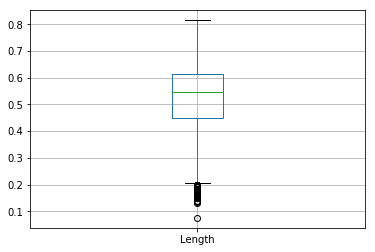

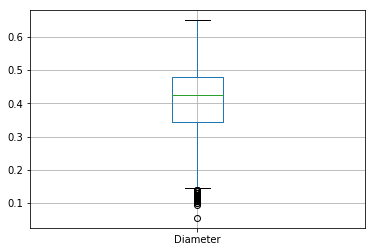

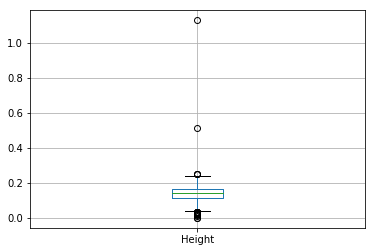

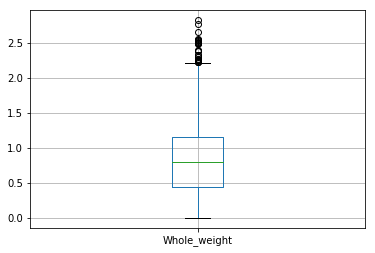

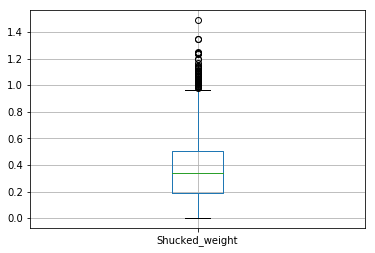

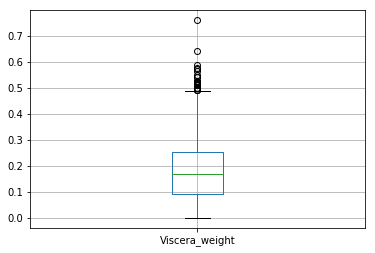

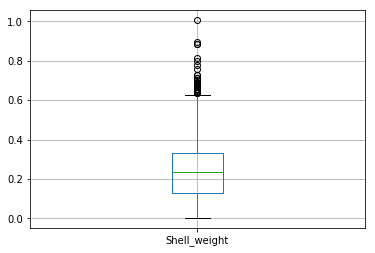

In [2]:
data = pd.read_excel("Data_nan.xlsx")
b=['Length','Diameter','Height','Whole_weight','Shucked_weight','Viscera_weight','Shell_weight']
new_data = data
for i in b :
    plt.figure(i)
    boxplot = new_data.boxplot(i)
    plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


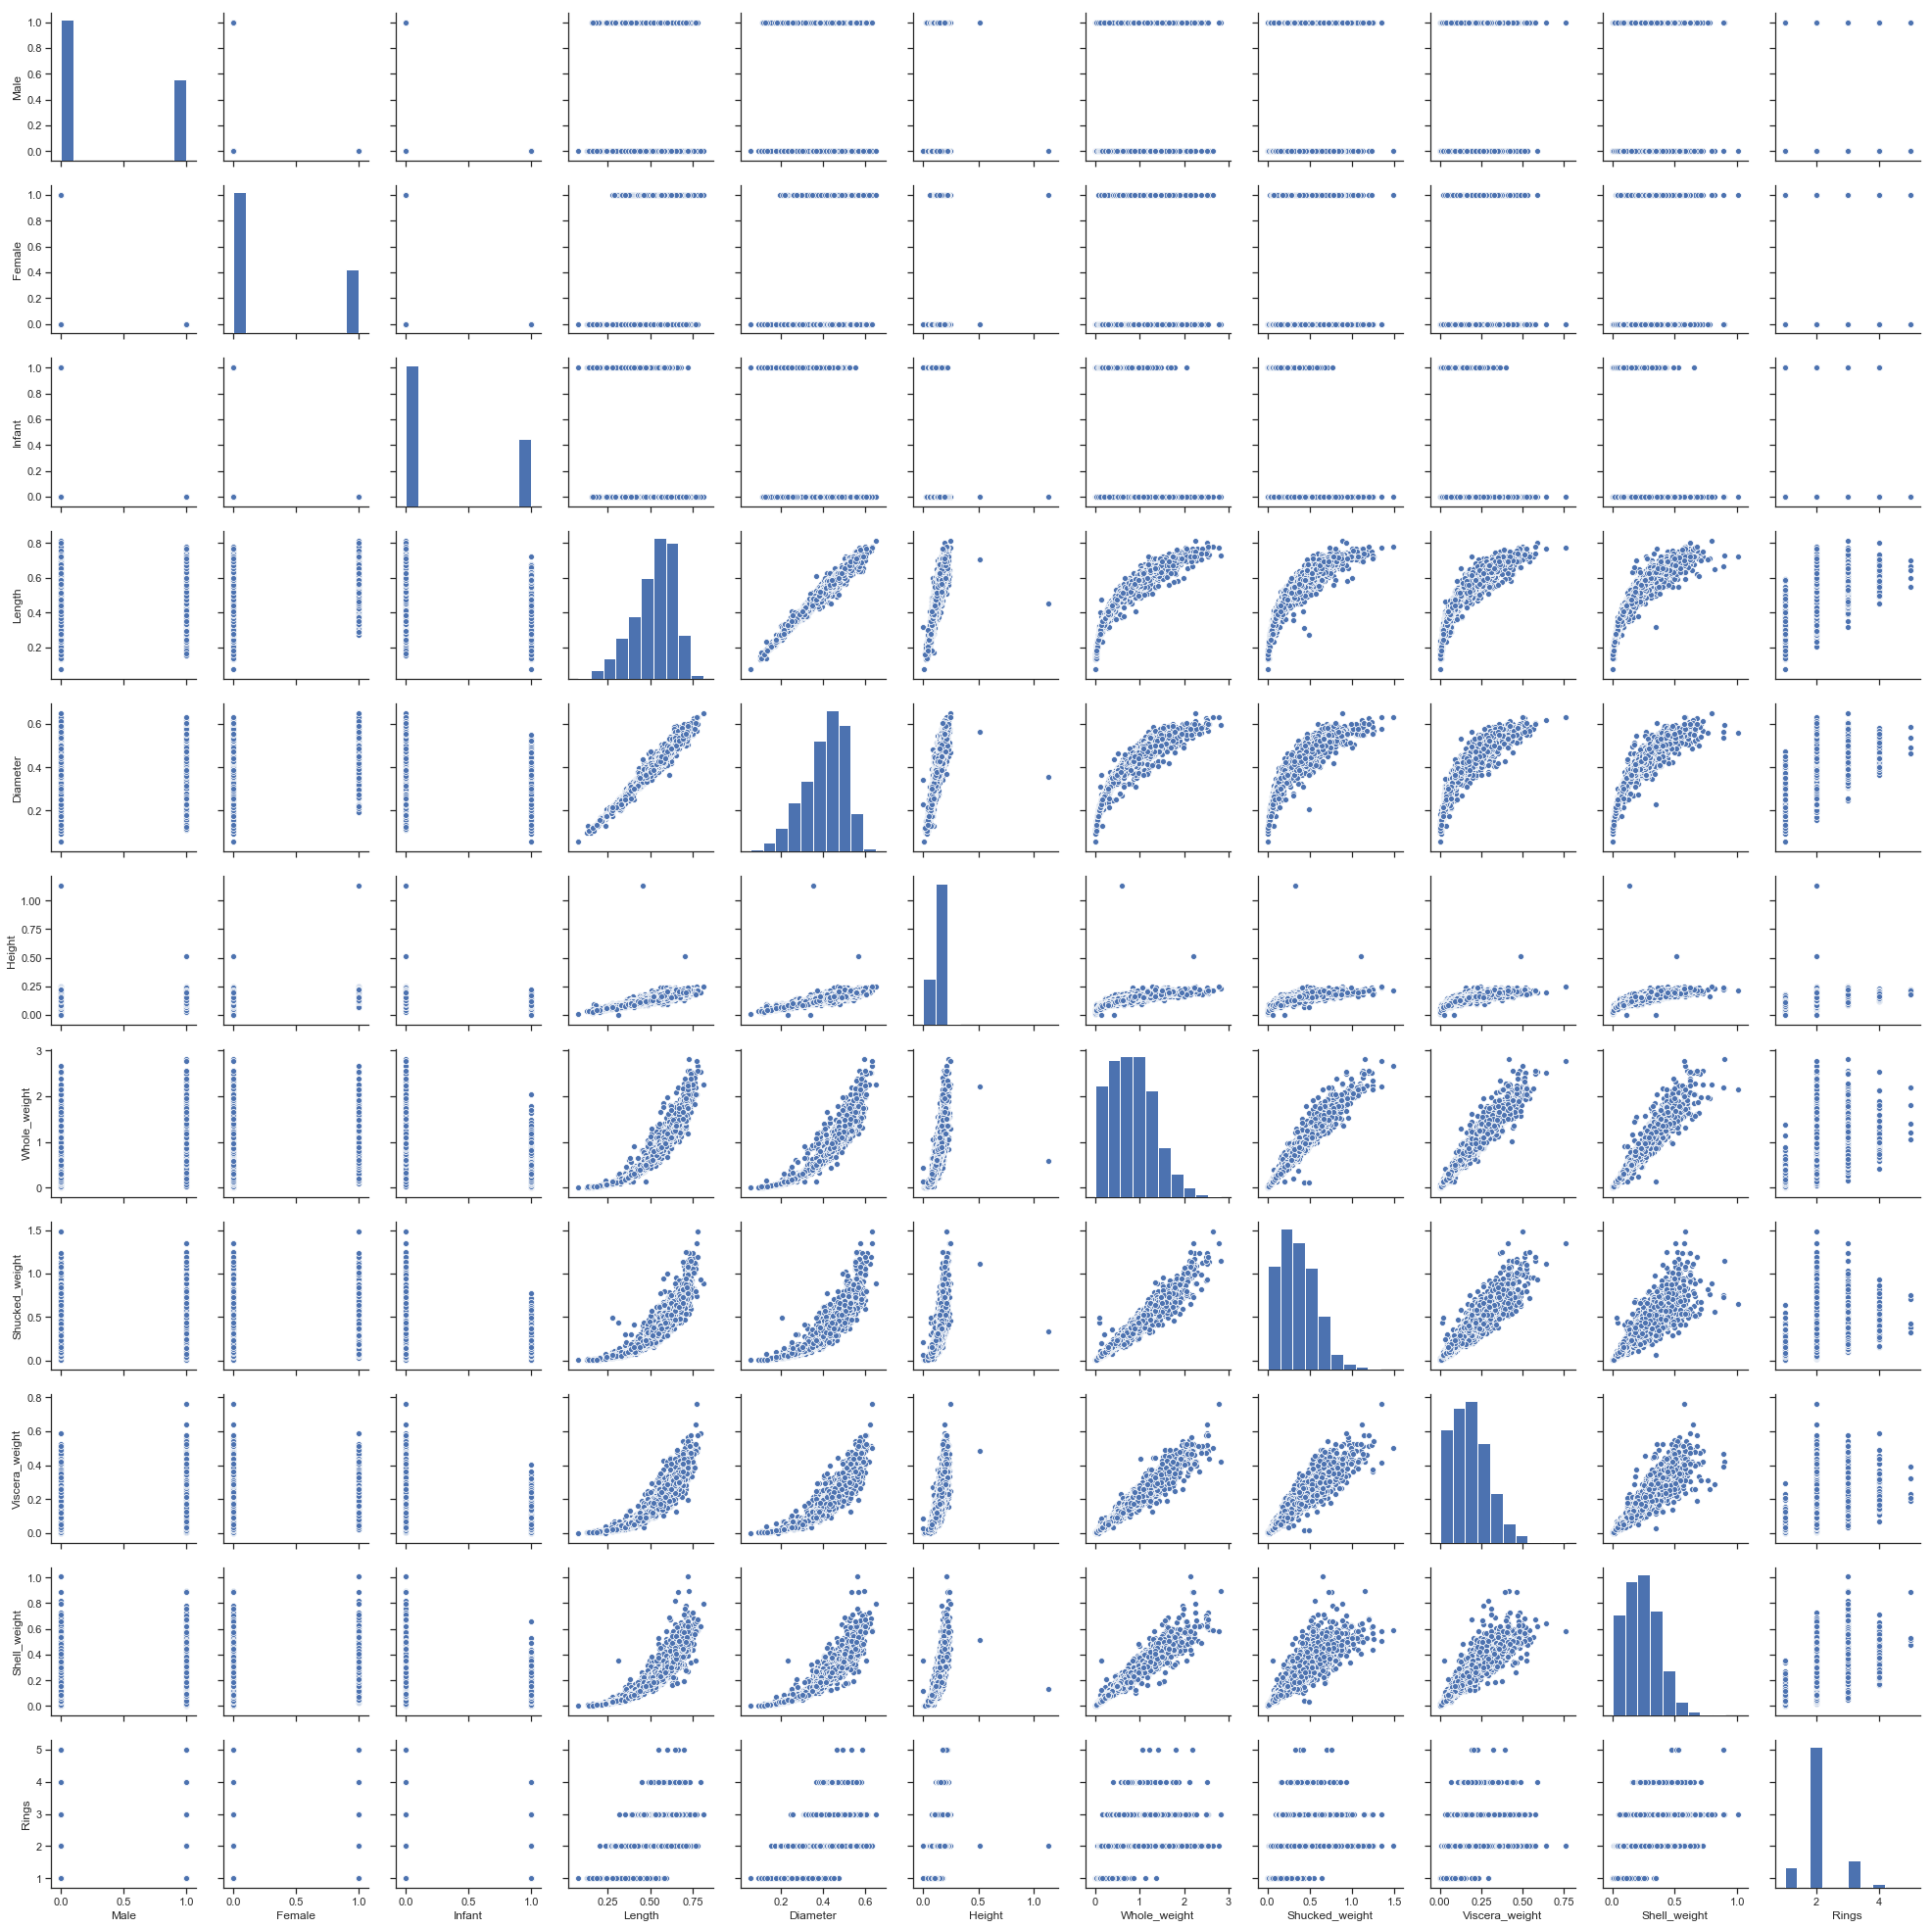

In [3]:
sns.set(style="ticks")
sns.pairplot(data)

### Replacing data with mean and written to the file mean_data  

In [4]:
new_data1 = data = pd.read_excel("Data_nan.xlsx")

for i in b :
    new_data1[i].replace(np.nan,np.mean(new_data1[i]),inplace=True)

new_data1.select_dtypes(include=['object']).isnull().sum()
new_data1.select_dtypes(include=[np.number]).isnull().sum()
new_data1.to_csv('mean_data.csv')



### Impute missing values with median and written to median_data file

In [5]:
a= []
for i in b:
    a.append(np.median(data[i]))

In [6]:
a0= a[0]
a1=a[1]
a2=a[2]
a3=a[3]
a4=a[4]
a5=a[5]
a6 =a[6]

new_data2  = pd.read_excel("Data_nan.xlsx")
new_data2[b[0]].replace(np.nan,a[0],inplace=True)
new_data2[b[1]].replace(np.nan,a[1],inplace=True)
new_data2[b[2]].replace(np.nan,a[2],inplace=True)
new_data2[b[3]].replace(np.nan,a[3],inplace=True)
new_data2[b[4]].replace(np.nan,a[4],inplace=True)
new_data2[b[5]].replace(np.nan,a[5],inplace=True)
new_data2[b[6]].replace(np.nan,a[6],inplace=True)
new_data2.to_csv('median_data.csv')


### Imputation Using k-NN and write a file as a knn_data

In [7]:
new_data3=  pd.read_excel("Data_nan.xlsx")
cl = new_data3.columns
X = new_data3
imputer = KNNImputer(n_neighbors=32, weights="uniform")
y= imputer.fit_transform(X)
y = y.transpose()
print(y)

C:\ProgramData\Anaconda3\lib\site-packages\missingpy\utils.py:124: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


[[1.         1.         0.         ... 1.         0.         1.        ]
 [0.         0.         1.         ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.101      0.0485     0.1415     ... 0.2875     0.261      0.40185938]
 [0.15       0.07       0.21       ... 0.308      0.296      0.495     ]
 [3.         2.         2.         ... 2.         2.         2.        ]]


In [8]:
data = y

df = pd.DataFrame(data)
df = df.transpose()
df.columns = cl
df.select_dtypes(include=['object']).isnull().sum()
df.select_dtypes(include=[np.number]).isnull().sum()
df.to_csv('knn_data.csv')